![image](docs/img/cern-csc-vis-header.png)
# Creating Visualizations with Matplotlib and Seaborn

In these exercises we will look at how we can visualize data using libraries from the Python universe.
The idea of these exercises is to introduce you to: 

 * data querying, grouping, etc. in Pandas (a library to help in the fast querying and manipulation of tabular data);
 * data visualization using some basic tools to see distributions and relationships
 * interactive data visualization using Altair
 * creating visualizations to help in communication of your findings.

There are number of libraries that are core to the work of a data scientist. On a daily basis I use all of the below:

 * [Matplotlib](http://matplotlib.org) is a fairly low level plotting library for Python inspired by Matlab.
 * [Seaborn](http://stanford.edu/~mwaskom/software/seaborn) is a higher-level library built on top of matplotlib with integrated analysis and specialized plots, e.g. violinplots, boxplots, etc.
 * [Bokeh](https://bokeh.pydata.org/en/latest/docs/gallery.html) is a relatively low-level library that provides high performance and interactive plotting functionalities. It also has a new counterpart called [HoloViews](http://holoviews.org/) that provides a simpler API on top of Bokeh. 
 * [Altair](https://altair-viz.github.io/index.html) is a plotting library on top of Vega (JSON-driven visualization language), which allows for the use of a visual grammar to build our visualizations (rendered via HTML and JavaScript). 
 * [Plotly](https://plot.ly/) is another popular interactive plotting library that has free and paid-for services. It provides a number of extensions such as Dash for the creation of rich interactive dashboards.

Each provides a set of functionalities that will obviously have overlaps, but some benefits (e.g. sub-sampling of many points in a scatter plot from Bokeh) prove invaluable when scale is important.
Also, some libraries will have implementations of visualization X, and some will not. 
__It is for this reason that our tool box is often greater than just one tool.__

In this section we will first look at static visualizations in **Pandas**, **Matplotlib**, and **Seaborn**.

As an optional set of exercises for those who are already well versed in Matplotlib and Seaborn, who want to learn something else, we proceed to using **Altair** for more interactive visual exploration of data.

**We will see as we go along why one library is often not enough.**

Note, exercises are marked in terms of difficulty by basic, advanced, or optional. These have been colour coded as follows:

<p style="background: #81ecec; padding: 10px; color: #2d3436"><strong>Basic</strong>: Basic will achievable by all in the class. This usually involves running the code you've seen before with your own parameters, or at most, checking the Matplotlib or Seaborn documentation on how to use some API.</p>

<p style="background: #fab1a0; padding: 10px; color: #2d3436"><strong>Advanced</strong>: This will be more appropriate for those who already have familiarity with the tools at hand, but which wil (hopefully) introduce some topics you have not seen before.</p>

<p style="background: #ffeaa7; padding: 10px; color: #2d3436"><strong>Optional</strong>: Optional allows you to express your inner data scientist and to show everyone how awesome you are in the use of Pandas, Matplotlib, and Seaborn :)</p>


In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Optional - All your requirements should be installed if you are using the CERN CSC Image or Binder. If you use SWAN, you need to run this.
!pip3 install -r requirements.txt --user --upgrade

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
%matplotlib inline

## Load Data

We're going to be using data on football player attributes from [FIFA 2019](https://www.kaggle.com/artimous/complete-fifa-2017-player-dataset-global).. Why? Well, because it's fun, it's highly multi-dimensional, and we can process the data in an infinite number of ways. 




In [4]:
fifa = pd.read_csv('data/fifa_player_data.csv.gz', compression='gzip')

## Pandas Basics

[Pandas](https://pandas.pydata.org/) is a fast, flexible library for the query and analysis of tabular data in Python. Under the hood it makes us of NumPy for the quick data operations and vector operations, and matplot for the visualization components.

Whilst the goal of these exercises is not necessarily to become experts in Pandas, you will need some basic knowledge to be able to create visualizations.

In [5]:
# We can also query our data
fifa.query('Position == "ST"').head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
10,188545,R. Lewandowski,29,Poland,90,90,FC Bayern München,€77M,€205K,2152,...,86.0,34.0,42.0,19.0,15.0,6.0,12.0,8.0,10.0,€127.1M
16,202126,H. Kane,24,England,89,91,Tottenham Hotspur,€83.5M,€205K,2165,...,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,€160.7M
23,153079,S. Agüero,30,Argentina,89,89,Manchester City,€64.5M,€300K,2107,...,90.0,30.0,20.0,12.0,13.0,15.0,6.0,11.0,14.0,€119.3M
36,173731,G. Bale,28,Wales,88,88,Real Madrid,€60M,€355K,2279,...,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,€123M


In [6]:
# We can also sort the data in any number of ways
fifa.sort_values('Acceleration', ascending=False).head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1968,213956,Adama,22,Spain,75,85,Wolverhampton Wanderers,€10.5M,€54K,1772,...,70.0,16.0,26.0,23.0,13.0,9.0,11.0,12.0,7.0,€22.1M
65,190483,Douglas Costa,27,Brazil,86,86,Juventus,€46.5M,€175K,2111,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,€76.7M
5886,212807,K. Manneh,23,United States,69,76,FC St. Gallen,€1.5M,€7K,1792,...,68.0,31.0,46.0,29.0,9.0,11.0,14.0,10.0,9.0,€2.4M
25,231747,K. Mbappé,19,France,88,95,Paris Saint-Germain,€81M,€100K,2118,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
2587,184312,J. Biabiany,30,France,74,74,Parma,€5.5M,€38K,1803,...,65.0,27.0,30.0,30.0,11.0,5.0,9.0,6.0,5.0,€9.9M


In [7]:
# We can also make the sort work on numerous values
fifa.sort_values(['Acceleration', 'Curve'], ascending=False).head(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
65,190483,Douglas Costa,27,Brazil,86,86,Juventus,€46.5M,€175K,2111,...,84.0,45.0,38.0,34.0,13.0,15.0,9.0,12.0,5.0,€76.7M
1968,213956,Adama,22,Spain,75,85,Wolverhampton Wanderers,€10.5M,€54K,1772,...,70.0,16.0,26.0,23.0,13.0,9.0,11.0,12.0,7.0,€22.1M
25,231747,K. Mbappé,19,France,88,95,Paris Saint-Germain,€81M,€100K,2118,...,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,€166.1M
5886,212807,K. Manneh,23,United States,69,76,FC St. Gallen,€1.5M,€7K,1792,...,68.0,31.0,46.0,29.0,9.0,11.0,14.0,10.0,9.0,€2.4M
164,213345,K. Coman,22,France,83,87,FC Bayern München,€34M,€85K,1918,...,75.0,29.0,17.0,15.0,5.0,3.0,5.0,3.0,5.0,€58.7M


### Grouping

We can even group items much like we'd do in SQL, perform calculations on some aggregated property, then plot values, just to get an idea of larger scale trends

In [ ]:
fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10)

In [ ]:
# Get the most common nationalities
fifa.groupby('Nationality').size().sort_values(ascending=False).head(10)

In [ ]:
# Get the most popular nationalities
fifa.groupby('Position').size().sort_values(ascending=False).head(10)

We can also plot this data directly using the matplotlib bindings linked from Pandas.

In [ ]:
fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10).plot(kind='bar', figsize=(10, 3))

<p style="background: #81ecec; padding: 10px; color: #2c3e50"><strong>BASIC EXERCISE</strong> | Which <strong>Position</strong> has the players with the highest average <strong>SprintSpeed</strong>?</p>

In [ ]:
# Answer 1

<p style="background: #81ecec; padding: 10px; color: #2c3e50"><strong>BASIC EXERCISE</strong> | Which <strong>Club</strong> has the players with the highest average <strong>SprintSpeed</strong>?</p>

In [ ]:
# Answer 2


<p style="background: #ffeaa7; padding: 10px; color: #2c3e50"><strong>OPTIONAL EXERCISE</strong> | Which position has the highest number of left footed players (Check out 'Preferred Foot') </p>

In [ ]:
# Answer 3

# Styling Plots (Matplotlib)

In this set of exercises, we are using Matplotlib as the underlying plotting library for Pandas and also Seaborn.
As such, we can change the styling to remove what is termed chart junk from the plots in order to bring focus to the data, not that which merely decorates it.

A full list of all customizable options is here https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html.

In [ ]:
# There is a list of often fairly garish styles that are available, e.g. this one below. 
# You can also try seaborn seaborn-colorblind, Solarize_Light2, seaborn-dark-palette

with plt.style.context('ggplot') as s:
        fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10).plot(kind='bar')

In our case, what we'll do is clean up the charts in terms of the use of the dark black lines for example. 
These serve no practical purpose and only add noise to the visual we're trying to show.

In [ ]:
# Here are some settings I use to remove some distractions including axis spines etc. that often distract from the visualization.

pd.set_option("display.max_columns",None)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.grid'] = False
plt.rcParams['axes.grid.axis'] = 'both'
plt.rcParams['axes.labelcolor'] = '#555555'
plt.rcParams['text.color'] = 'black'
plt.rcParams['figure.figsize'] = 6,4
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.titleweight'] = 'normal'
plt.rcParams['font.family'] = 'sans-serif'

In [ ]:
fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10).plot(kind='bar', title='Top 10 Countries for Average Ball Control', color='black')
plt.ylabel('Ball Control');

If you so wanted, you could also restrict the Y axis to make the differences more obvious between the groups (but be careful when doing this). This is a technique, as shown in the lectures, to make people believe the differences are bigger than they are.

In [ ]:
fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10).plot(kind='bar', title='Top 10 Countries for Average Ball Control', color='black')
plt.ylabel('Ball Control');
plt.ylim([90,100]);

## Annotating Plots

Annotating plots is always good for highlighting outliers, telling a story, etc.

Since the basis of all the libraries we use here is matplotlib, we can annotate all of our plots in the same way!

Have a check [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html) for configurable text and arrow properties. And [here](https://matplotlib.org/3.1.1/tutorials/text/annotations.html#plotting-guide-annotation) for a more complete level of documentation.

In [ ]:
_df = fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10)
_df.plot(kind='bar', title='Top 10 Countries for Average Ball Control', color='black')
plt.ylabel('Ball Control');
# plt.ylim([90,100]);

plt.annotate('Brazil is a nice country', xy=(1, 95), xytext=(0.6, 97),
            arrowprops=dict(facecolor='red', arrowstyle='->'))

## Scales

Truncating the Y-axis should be done with caution, but sometimes it makes sense, otherwise the differences will be almost invisible.

In [ ]:
_df = fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10)
_df.plot(kind='bar', title='Top 10 Countries for Average Ball Control', color='black')
plt.ylabel('Ball Control');

# To fix the range of the y-axis, we use the ylim() method
plt.ylim([90,100]);

plt.annotate('Brazil is a nice country', xy=(1, 95), xytext=(0.6, 97),
            arrowprops=dict(facecolor='red', arrowstyle='->'))

In [ ]:
_df = fifa.groupby('Nationality').agg({'BallControl':'max'}).sort_values('BallControl', ascending=False).head(10)
_df.plot(kind='bar', title='Top 10 Countries for Average Ball Control', color='black')
plt.ylabel('Ball Control');

# To fix the range of the y-axis, we use the ylim() method
# scale types are linear, log, logit, and symlog. - see https://matplotlib.org/gallery/pyplots/pyplot_scales.html#sphx-glr-gallery-pyplots-pyplot-scales-py
plt.yscale('log');

plt.annotate('Brazil is a nice country', xy=(1, 95), xytext=(2.6, 95.5),
            arrowprops=dict(arrowstyle='-'))

# Visualizing Distributions

## Histograms

In [ ]:
# Directly from our dataframe, we can plot the distributions for all of our features, just to see how everything looks
fifa.hist(bins=20, figsize=(20,20), color='black');

In [ ]:
# We can plot the distribution for just one of our features, and also change the number of bins.
fifa.Penalties.plot(kind='hist', bins=10, color='black');

We have a pretty normal distribution here with the mean value for penalty taking ability being around 50.

But of course, we've made some decisions here in advance, such as the number of bins for the histogram. Changing this value will ultimately affect the resulting visualization. Let's try this with another feature.

<p style="background: #81ecec; padding: 10px; color: #2c3e50"><strong>BASIC EXERCISE</strong> | Plot the distributions for <strong>Acceleration</strong>. How does the number of 'bins' change your view of the data?</p>

In [ ]:
# Answer 4

In [ ]:
# seaborn also offers not just a histogram but also an kernel density enstimation
# sns.distplot(fifa.Rating,bins=50, color='#2ecc71')

fifa.query('Club == "Juventus"').Penalties.plot(kind='hist', bins=10, color='black', alpha=0.3, label='Juventus')
fifa.query('Club == "FC Barcelona"').Penalties.plot(kind='hist', bins=10, color='#a70042', alpha=0.3, label='FC Barcelona')
plt.title('Penalty Proficiency - Juventus vs Barcelona', fontdict={'fontsize': 14, 'fontweight':'normal'})
plt.legend()

This is a simple chart, but you can already see that simply changing the bins can dramatically change the output we get, and the inferences/insights we get.

<p style="background: #81ecec; padding: 10px; color: #2c3e50"><strong>BASIC EXERCISE</strong> | Plot two histograms, one on top of the other for <strong>Acceleration</strong> of <strong>Italian</strong> Players vs <strong>Brazilian</strong> players.
<br/>
<br/>
Hint: if you plot two histograms immediately after one another, the same figure will be used unless you call plt.figure() in between. 
</p>

In [ ]:
# Answer 5

### KDE Plots

Kernel Density Estimation can be used in 1D and 2D plots. It is a parameter free method to estimate the PDF (probability density function) of a random variable. In our case, we can use the KDE to provide smooth boundaries of the joint probability distribution, substituting all of our data points from the scatter plot with a type of contour grid much like that which you would see in cartography.

In [ ]:
sns.distplot(fifa.query('Position == "CB"').Acceleration)

KDE Plots make comparison of distributions much clearer than overlaying multiple histograms.

Again, this is because we're removing noise that's present due to the high frequency lines from the histogram.

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(10,4))

sns.kdeplot(fifa.query('Position == "CB"').Acceleration, shade=True, label='Defender Acceleration', ax=ax[0])
sns.kdeplot(fifa.query('Position == "ST"').Acceleration, shade=True, label='Striker Acceleration', ax=ax[0])

sns.distplot(fifa.query('Position == "CB"').Acceleration, label='Defender Acceleration', ax=ax[1])
sns.distplot(fifa.query('Position == "ST"').Acceleration, label='Striker Acceleration', ax=ax[1])

fig.suptitle('Defender vs Striker Acceleration');

**But be careful, KDEs can be manipulated by setting different bandwidths for instance which change the way the plot looks, much like what happens with the bins in a basic histogram**

In [ ]:
sns.kdeplot(fifa.query('Position == "ST"').Acceleration, shade=True, label='Defender Acceleration')
sns.kdeplot(fifa.query('Position == "ST"').Acceleration, shade=True, label='Striker Acceleration', bw=4)

plt.title('Defender vs Striker Acceleration');

## Box Plots

In [ ]:
fifa.boxplot('Overall', by='Position', rot=90, figsize=(15, 7));

We can also use Seaborn to visualize Boxplots, which provides nicer styling by default, but as you'll see, the syntax is as easy as using the boxplot function from Pandas.

In [ ]:
fig = plt.figure(figsize=(15, 7))
g = sns.boxplot(x="Position", y="Overall", data=fifa, palette=sns.color_palette(['#2ecc71']))
plt.title('Overall rating by Position');

## Swarm Plots

These plots the actual points, with some jitter to help us see how many points (roughly are around particular values).

We will use a sample of the data for this, to avoid rendering all data points.

In [ ]:
sample_data = fifa.sample(2000)

In [ ]:
fig = plt.figure(figsize=(20, 7))
g = sns.swarmplot(x="Position", y="Acceleration", data=sample_data, hue='Preferred Foot')
plt.title('Overall rating by Position');

**Swarm Plots** can also be overlaid on top of other plots.

We use a sample here, otherwise there are many points to plot.

In [ ]:
fig = plt.figure(figsize=(20, 7))
g = sns.boxplot(x="Position", y="Acceleration", data=sample_data, palette=sns.color_palette(['#2ecc71']))
g = sns.swarmplot(x="Position", y="Acceleration", data=sample_data, palette=sns.color_palette(['#2ecc71']))
plt.setp(g.get_xticklabels(), rotation=90);

# We should also add a title!
plt.title('Acceleration Distributions by Position', fontdict={'fontsize': 18, 'fontweight':'normal'})

# And we can change the size of the labels on the axes.
g.yaxis.label.set_size(14)
g.xaxis.label.set_size(14)

It's quite hard to see from this plot which position is the fastest, (slowest is easier). It would be useful to be able to sort the X axis so that comparison is easier and **less cognitively demanding**.

What we can do is provide an order variable to the box and swarm plots to tell Seaborn what order we wish to display the data in on the X axis.

In [ ]:
# This groups by the Position, then gets the average Acceleration per position, and sorts the values in descending order. Finally, we take the index, which is the position (due to the groupby).
fastest_average = sample_data.groupby('Position').agg({'Acceleration': 'mean'}).sort_values('Acceleration', ascending=False).index

In [ ]:
fastest_average

In [ ]:
fig = plt.figure(figsize=(20, 7))
g = sns.boxplot(x="Position", y="Acceleration", data=sample_data, order=fastest_average, palette=sns.color_palette(['#2ecc71']))

g = sns.swarmplot(x="Position", y="Acceleration", data=sample_data, order=fastest_average, palette=sns.color_palette(['#2ecc71']))

plt.setp(g.get_xticklabels(), rotation=90);

This simple transformation makes it much easier for users to extract information from the plot!

Our users will thank us...maybe.

## Violin Plots

As shown in the lectures, Boxplots, can often hide the true distributions. 

Whilst the Boxplots with the Swarmplots let us see more of the data, the approach is not always scalable (if we have millions of data points, we can't easily plot millions of points in Matplotlib on our machines).

Since there are no violin plots by default in Matplotlib, we can use Seaborn for this. **This is reason we need multiple libraries in our toolbox.**

<p style="background: #81ecec; padding: 10px; color: #2c3e50"><strong>BASIC EXERCISE</strong> | Take a look at the <a href="https://seaborn.pydata.org/examples/index.html" target="_new">Seaborn gallery</a> and find how you can use the Violinplot in your analysis. </p>

In [ ]:
# Answer 6

<p style="background: #81ecec; padding: 10px; color: #2c3e50"><strong>BASIC EXERCISE:</strong> The Seaborn library also allows for direct comparisons of groups within the Violin plots - it plots group 1 on the left side of the violin, and group 2 on the right. How can you use the functions of the library to compare players based on their PreferredFoot for example? 
<br/>
<br/>
    Hint: Have a look at the <a href="https://seaborn.pydata.org/generated/seaborn.violinplot.html">Violin Plot Documentation</a></p>

In [ ]:
# Answer 7

## Boxen Plots

Boxen Plots do an equally good job of showing us how many points on the Y axis by having a rectangle that scales by the number of points in each bin. I actually prefer Boxenplots to Violinplots.

In [ ]:
fig = plt.figure(figsize=(20, 7))
g = sns.boxenplot(x="Position", y="Acceleration", hue='Preferred Foot', palette=sns.color_palette(['#bdc3c7', '#7f8c8d']), data=fifa)

<p style="background: #81ecec; padding: 10px; color: #2c3e50"><strong>BASIC EXERCISE</strong> |  Create a boxenplot showing the distribution of <strong>SprintSpeed</strong> by <strong>Position</strong>.
<br/>
Which position has the fastest players?
</p>

In [ ]:
# Answer 8

<p style="background: #fab1a0; padding: 10px; color: #2c3e50"><strong>ADVANCED EXERCISE</strong>: Answering the above question can be difficult when the bars are not aligned. Can you make it easier for us to answer such a question? Sort the positions by the average <strong>SprintSpeed</strong> (see example above for the Boxplot...).</p>

In [ ]:
# Answer 9

<p style="background: #ffeaa7; padding: 10px; color: #2c3e50"><strong>OPTIONAL EXERCISE</strong>: Can you find the high outlier(s) for the LW position and annotation to mark who this player is?</p>

In [ ]:
# Answer 10

# Visualizing Correlations

We can also look at the correlations between variables in the traditional scatter plot. We can create them in a number of ways.

## Scatter Plots

In [ ]:
# The first way is using Matplotlib
plt.figure(figsize=(15,10))
plt.scatter(x=fifa['Acceleration'],y=fifa['SprintSpeed'], alpha=0.2)
plt.title('Acceleration vs Sprint Speed')
plt.xlabel('Acceleration');
plt.ylabel('Sprint Speed');

### Annotating

When exploring your dataset, you may find some interesting outliers, 

It would be useful to be able to add some context to this plot. Maybe we'd like to describe some of the points in the graphs, for example the outliers, or the player with the best SprintSpeed, and Acceleration

In [ ]:
# fifa.query('Acceleration > 95 & SprintSpeed < 95')[['Name', 'SprintSpeed', 'Acceleration']]

In [ ]:
# The first way is using Matplotlib
plt.figure(figsize=(15,10))
plt.scatter(x=fifa['Acceleration'], y=fifa['SprintSpeed'], alpha=0.2)
plt.title('Acceleration vs Sprint Speed')
plt.xlabel('Acceleration');
plt.ylabel('Sprint Speed');

plt.annotate('Adama', xy=(97, 96), xytext=(40, 80), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));
plt.annotate('T. Ito', xy=(93, 69), xytext=(100, 40), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));
plt.annotate('F. Geisler', xy=(90, 64), xytext=(90, 20), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.scatterplot(x="Acceleration", y="SprintSpeed", hue="Position", data=fifa, alpha=0.2)

plt.annotate('Adama', xy=(97, 96), xytext=(40, 80), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));
plt.annotate('T. Ito', xy=(93, 69), xytext=(100, 40), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));
plt.annotate('F. Geisler', xy=(90, 64), xytext=(90, 20), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));

There is an obvious correlation here between Acceleration and SprintSpeed. Intuitively, we would expect this.

In [ ]:
# Of course, the summary statistics nicely made available through Pandas helper functions will confirm this :)
fifa[['Acceleration', 'SprintSpeed']].corr()

In [15]:
mapping = {'RCB': 'DEF', 'LCB': 'DEF', 'CB': 'DEF',
           'LB': 'DEF', 'RB': 'DEF', 
           'LWB': 'DEF', 'RWB': 'DEF',
           'CDM': 'MID', 'RM': 'MID',
           'LCM': 'MID', 'RCM': 'MID', 'LM': 'MID', 'CAM': 'MID',
           'LDM': 'MID', 'RDM': 'MID',
           'LAM': 'MID', 'RAM': 'MID',
           'CM': 'MID', 'LW': 'MID', 'RW': 'MID',
           'LS': 'ST', 'RS': 'ST', 'RF': 'ST', 'LF': 'ST', 'CF': 'ST'
          }
fifa['GeneralPosition'] = fifa.Position.apply(lambda x: mapping[x] if x in mapping else x )

In [16]:
fifa = fifa[~fifa.GeneralPosition.isna()]

In [ ]:
plt.figure(figsize=(15,10))

ax = sns.scatterplot(x="Acceleration", y="SprintSpeed", hue="GeneralPosition", data=fifa, alpha=0.2)

plt.annotate('Adama', xy=(97, 96), xytext=(40, 80), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));
plt.annotate('T. Ito', xy=(93, 69), xytext=(100, 40), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));
plt.annotate('F. Geisler', xy=(90, 64), xytext=(90, 20), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));

This is a bit better of course since now we have many fewer colours. One obvious problem however is the overlap of points and colours. Only one category really stands out, and that is the goalkeeper group.

In order to reduce the information load, we can perhaps show where the greater densities of points lay, whilst drawing the individual points for a specific group of players. 

Let's say for example, Romanian players in the context of all other players.

#### 2D KDEs

In [ ]:
sns.kdeplot(fifa.query('Position == "CB"').Acceleration, fifa.query('Position == "CB"').SprintSpeed, shade=True, shade_lowest=False, legend=True)

We can combine the scatter with the KDE plots to help us show the overall distributions of the data, whilst focusing on a few (or more if you prefer) data points.

In [ ]:
plt.figure(figsize=(15,10))

# We create our dataframes for use in building a number of KDE plots with different colours for each position.
GK = fifa.query('GeneralPosition == "GK"')
DEF = fifa.query('GeneralPosition == "DEF"')
MID = fifa.query('GeneralPosition == "MID"')
ST = fifa.query('GeneralPosition == "ST"')

sns.kdeplot(DEF.Acceleration, DEF.SprintSpeed, cmap='Reds', shade=True, shade_lowest=False, label='DEF', alpha=0.8, legend=False)
sns.kdeplot(MID.Acceleration, MID.SprintSpeed, cmap='Oranges', shade=True, shade_lowest=False, label='MID', alpha=0.8, legend=False)
sns.kdeplot(ST.Acceleration, ST.SprintSpeed, cmap='Blues', shade=True, shade_lowest=False, label='ST', alpha=0.8, legend=False)

# We draw last to ensure our group of interest is rendered on top of the others.
sns.kdeplot(GK.Acceleration, GK.SprintSpeed, cmap='Greens', shade=True, shade_lowest=False, label='GK', alpha=0.7, legend=False)

# Add the scatter points for only goalkeepers from Romania
sns.scatterplot(x="Acceleration", y="SprintSpeed", color='green', data=GK.query('Nationality == "Romania"'))

# Highlight the 2 'best' goalkeepers
plt.annotate('C. Tătăruşanu', xy=(50, 47), xytext=(40, 80), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));
plt.annotate('C. Pantilimon', xy=(48, 42), xytext=(70, 20), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));

## Joint Plots

Seaborn offers a lot of functionality out of the box.
For instance, the joint plot gives us both histograms for the distributions of each variable, and also the joint distribution in the form of a scatter plot.

For the first basic plot, we will plot the regression line alongside the points and marginal distributions. Seems complicated, but this is very easy in Seaborn.

In [ ]:
sns.jointplot("BallControl", "Dribbling", data=fifa, kind="reg", color="#555555", size=7)

In this version we'll plot densities using the hexbins. This will reduce the noise a bit a show us the marginal distributions again but also a view of where the largest number of points is distributed.

In [ ]:
sns.jointplot("BallControl", "Dribbling", data=fifa, kind="hex", color="#555555", size=7)

Finally, we can use the Kernel Density Estimate (KDE) which provides a smooth estimation of the underlying disribution. This will reduce the noise a bit a show us the marginal distributions again but also a view of where the largest number of points is distributed.

In [ ]:
sns.jointplot("BallControl", "Dribbling", data=fifa, kind="kde", color="#555555", size=7)

As in the Hex plot, we can see two distinct groups in the data.

## Joint plots with Marginal Rugs

In [ ]:
grid = sns.JointGrid("BallControl", "Dribbling", data=fifa)
grid.plot_joint(plt.scatter, color='black', alpha=0.05)
grid.plot_marginals(sns.rugplot, height=0.2, alpha=0.01, color='black')

### Annotations to highlight points of interest.

In [ ]:
fifa.query('BallControl > 90 & Dribbling >90')[['Name', 'BallControl', 'Dribbling']]

In [ ]:
plt.figure(figsize=(5,5))
grid = sns.JointGrid("BallControl", "Dribbling", data=fifa)
grid.plot_joint(plt.scatter, color='black', alpha=0.07)
grid.plot_marginals(sns.rugplot, height=0.2, alpha=0.01, color='black')

grid.ax_joint.annotate('Raúl Navas', xy=(73, 25), xytext=(80, 10), arrowprops=dict(arrowstyle='->', connectionstyle='arc'));

grid.ax_joint.annotate('Leo Messi', xy=(96, 97), xytext=(40, 80), arrowprops=dict(arrowstyle='->', connectionstyle='angle'));

grid.ax_joint.annotate('Douglas Costa', xy=(91, 92), xytext=(75,40), arrowprops=dict(arrowstyle='->', connectionstyle='angle3'));

<div style="background: #81ecec; padding: 10px; color: #2c3e50"><p><strong>BASIC EXERCISE</strong> |  Which features are more correlated? </p>
<ul>
<li><strong>Reactions</strong> and <strong>SprintSpeed</strong>;</li>
<li><strong>Reactions</strong> and <strong>Curve</strong>; or</li>
<li><strong>Reactions</strong> and <strong>Composure</strong></li>
</ul>
</div>

In [ ]:
# Answer 11

## Heatmaps

While the techniques we've shown above are good for a few data points, they don't scale so well. 

Also, we don't necessarily need to visualize all possible pairwise comparisons of features to see which are more correlated. We can use the pearson correlation metric to help us find the most or least correlated features, and use that to drill down on the most interesting pieces of information.

So let's go for a global view of the data.

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(fifa.corr())

<p style="background: #81ecec; padding: 10px; color: #2c3e50"><strong>BASIC EXERCISE</strong> | If you were a player and wanted to have a high <strong>overall</strong> rating, which two features should you have? </p>

In [ ]:
# Answer 12

Is the visualization in its current form really suitable for the answering of such questions? I don't think so. So, now we'll improve this plot using some of the things we learnt in the lecture. The first being colour, the second beind grouping.

<p style="background: #81ecec; padding: 10px; color: #2c3e50"><strong>BASIC EXERCISE</strong> | Assuming you have used the default colourmap, you may notice that it's not easy to see the positive vs negative correlations. Have a look at the colormaps available in the <a href="https://seaborn.pydata.org/tutorial/color_palettes.html#diverging-color-palettes" target="_blank">documentation here</a> and change the colour map to a more suitable alternative.</p>

In [ ]:
# Answer 13

This is much better, right? You don't need to work hard to convert the sequential scale from before to positive and negative correlations, the colour map helps us. 

<p style="background: #81ecec; padding: 10px; color: #2c3e50"><strong>BASIC EXERCISE</strong> | As we discussed in the lectures, it's better if groups of similar item/colours are close together to facilitate comparison. The clustermap from seaborn can bring some order to this currently wild visualization. Check out the <a href="https://seaborn.pydata.org/generated/seaborn.clustermap.html" target="_blank">seaborn documentation</a> to see how you can use this visualization.</p>

In [ ]:
# Answer 14

<p style="background: #ffeaa7; padding: 10px; color: #2c3e50"><strong>OPTIONAL EXERCISE</strong> | Is this visualization safe for colourblind users? You can check here at <a href="https://www.color-blindness.com/coblis-color-blindness-simulator/" target="_blank">Color Blindness Simulator</a> </p>

In [ ]:
# Answer 15

# Multivariate Distributions

So far, we've seen how we can we can visualize one or two variables and their distributions, but we often have many more variables. Therefore we'd like to be able to visualize more at once to discover areas of interest.

## Scatter Plot Matrices

In [ ]:
# We can do this pretty easily with Seaborn, however, for very large data frames, 
# this is computationally expensive to plot. So we'll focus on one country, Spain!
sns.pairplot(fifa[fifa.Nationality=='France'][['Composure', 'StandingTackle', 'LongShots', 
                                              'Curve', 'Volleys', 'Jumping', 'Reactions', 'Position']], hue='Position');

This is a classic example of where too many colours really messes up any possible messages that could be extracted from a visualization.

If we think back to our lectures, we stated that we should have between 8-10 colours at a maximum. Here we've violated that guideline by having 28!

We need to reduce the number of colours, and there are a number of strategies, but all centre around a need to reduce the number of categories we want to show.

To take 28 to a lower number, we can:
 
 * Focus on particular sets of positions; or
 * Map these very specific positions to more general ones. e.g. RCB and LCD is a type of Defender. 
 
We'll try the second one now. This will be our first foray in to data cleaning, a key job in data science :)

We can do this by using a mapping dictionary between the fine-grained positions to a more general one. Then we use the apply function on the position field to map the values.

<div style="background: #81ecec; padding: 10px; color: #2c3e50"><p><strong>BASIC EXERCISE</strong> | This is a great example of a potentially nice visualization can be messed up by a terrible colour map.<br/>
How would you go about improving this visualization?</p>
</div>

In [ ]:
# Answer 16

Plotting individual points is cool, but there is a lot of noise in these plots. There are other techniques you can use to increase the saliency of content in the visualization. 

A key question to always ask yourself is, what do I really want to see? In this instance, I want to see which values are more correlated with each other. Therefore having all the points, while nice, will slow down my visualization, and add noise.

So, with that in mind, let's look at visualizing this data in a more clean way using Kernel Density Estimations.

## PairGrids

We can also create some pretty advanced visualizations by combining different types of plots. 

For instance, we want to show: 
 * a **scatter plot** to the **right of the diagonal**;
 * a **KDE plot** to the **left of the diagonal**;
 * a **histogram** in the **diagonal**;
 
Seaborn allows us to compose these plots together like so.

In [ ]:
g = sns.PairGrid(fifa[fifa.Nationality=='England'][['Agility', 'Vision', 'LongShots', 'ShortPassing', 'Composure', 'Reactions', 'GeneralPosition']], hue='GeneralPosition')

# What needs to be on the right of the diagonal.
g.map_upper(sns.kdeplot, shade=True, shade_lowest=False)

# What needs to be on the left of the diagonal.
g.map_lower(sns.scatterplot, alpha=0.5)

# What should be on the diagonal
g.map_diag(plt.hist, bins=10, alpha=0.5);

plt.legend(loc='best')

<div style="background: #81ecec; padding: 10px; color: #2c3e50"><p><strong>BASIC EXERCISE </strong> | Which feature has the least divergence in distributions (most overlap) by GeneralPosition?</p>
</div>

In [ ]:
# Answer 17

## Parallel Coordinates

My favourite! Perfect for visualizing many variables at once, for help in clustering, and outlier detection in particular.

In [13]:
from pandas.plotting import parallel_coordinates

In [17]:
spanish_players = fifa[fifa.Nationality  == 'Spain']
string_columns = [fifa.columns[idx] for idx, data_type in enumerate(fifa.dtypes) if data_type == 'object']

# We want to keep the GeneralPosition column (to colour our coordinates) 
string_columns.pop(string_columns.index('GeneralPosition'));
string_columns.pop(string_columns.index('Name'));

spanish_players = spanish_players.drop(['ID', 'Special', 'Name'] + string_columns, axis=1).dropna()

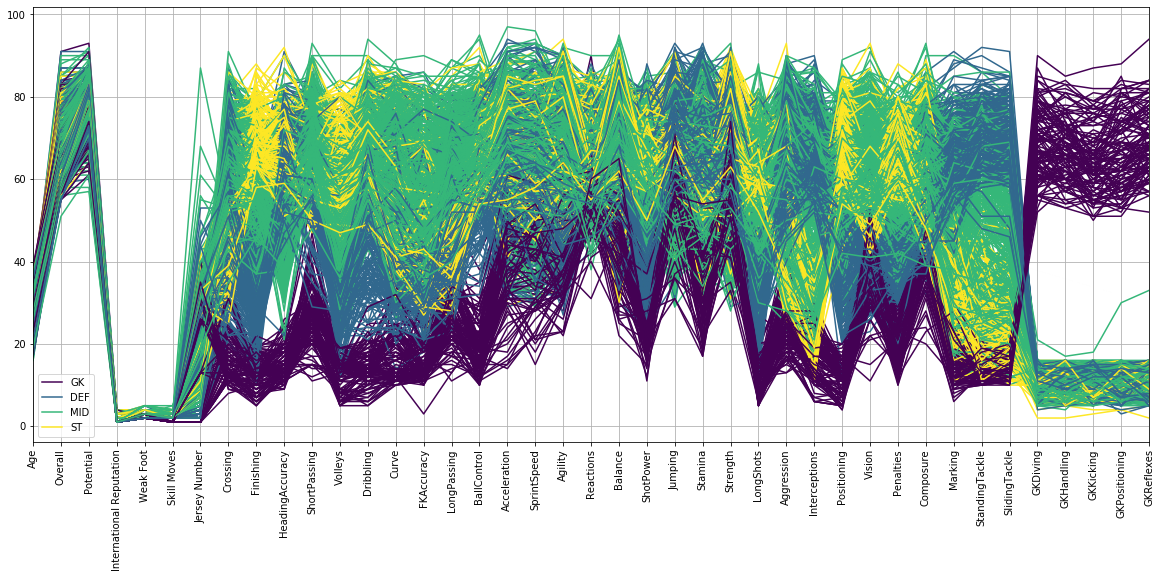

In [18]:
plt.figure(figsize=(20, 8))

g = parallel_coordinates(spanish_players, 'GeneralPosition', colormap='viridis', axvlines=False)
plt.legend(loc='best')
plt.setp(g.get_xticklabels(), rotation=90);

### Placing Correlated Columns Closer together

Now, as we discussed in the lecture, the utility of the Parallel Coordinates is greatly influenced by the ordering of the columns. Can we order the columns so that the most correlated features are closer together?

Here, we will use the clustermap function from Seaborn, which also gives us a rather nice chart. 

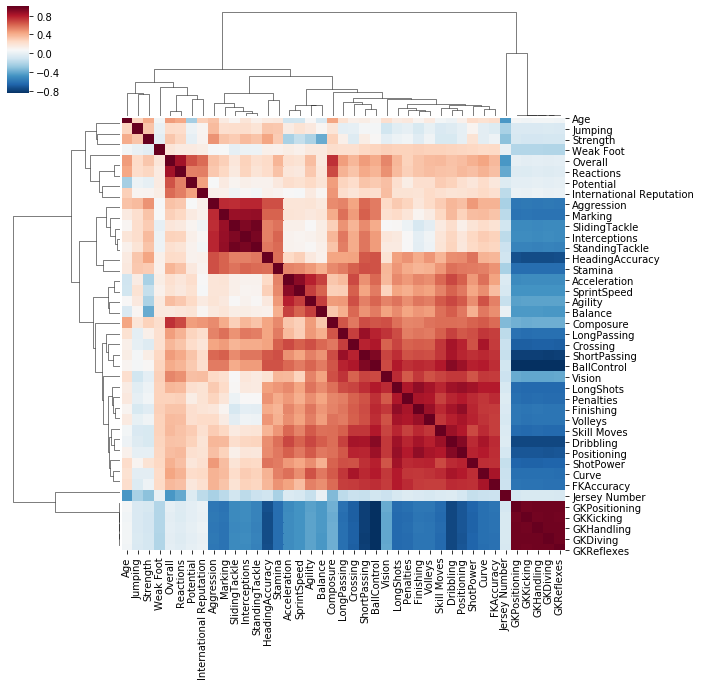

In [19]:
clustermap = sns.clustermap(spanish_players.corr(), cmap='RdBu_r')

You'll see that it automatically performs hierarchical clustering on the correlation matrix, so we can see that there are groups of features that are highlighly correlated, in particular:

 * Goalkeeper features in particular;
 * Defending features such as Aggression, Marking, SlidingTackle, and Interceptions;
 * Physical features such as Stamina, Acceleration, SprintSpeed, Agility, and Balance;
 * Passing features such as BallControl, LongPassing, ShortPassing, and Crossing; and
 * Shooting features such as Finishing and Volleys
 
We can access this 'Dendrogram' (the technical term for the tree visualization on columns and rows) easily via this command.

In [20]:
spanish_players.columns[clustermap.dendrogram_row.reordered_ind]

Index(['Age', 'Jumping', 'Strength', 'Weak Foot', 'Overall', 'Reactions',
       'Potential', 'International Reputation', 'Aggression', 'Marking',
       'SlidingTackle', 'Interceptions', 'StandingTackle', 'HeadingAccuracy',
       'Stamina', 'Acceleration', 'SprintSpeed', 'Agility', 'Balance',
       'Composure', 'LongPassing', 'Crossing', 'ShortPassing', 'BallControl',
       'Vision', 'LongShots', 'Penalties', 'Finishing', 'Volleys',
       'Skill Moves', 'Dribbling', 'Positioning', 'ShotPower', 'Curve',
       'FKAccuracy', 'Jersey Number', 'GKPositioning', 'GKKicking',
       'GKHandling', 'GKDiving', 'GKReflexes'],
      dtype='object')

Now, we can plug this in to the Parallel Coordinates visualization to try and reduce the work required by the users of our visualization, or indeed us!

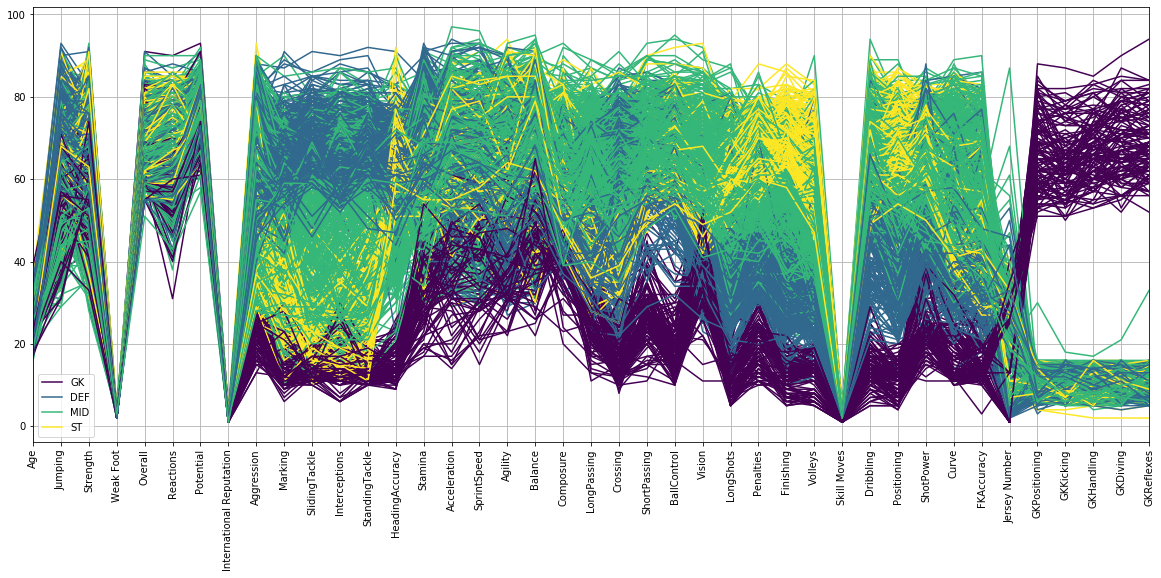

In [21]:
plt.figure(figsize=(20, 8))
g = parallel_coordinates(spanish_players.dropna(), 'GeneralPosition', cols=spanish_players.columns[clustermap.dendrogram_row.reordered_ind], axvlines=False, colormap='viridis')
plt.legend(loc='best')
plt.setp(g.get_xticklabels(), rotation=90);

### Adding Annotations

In [22]:
fifa.query('GKReflexes >30 & GeneralPosition == "MID"')

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,GeneralPosition
4736,221179,Sebas Coris,25,Spain,71,74,Gimnàstic de Tarragona,€3M,€17K,1809,...,45.0,65.0,62.0,21.0,17.0,18.0,30.0,33.0,NaN,MID


Text(40, 40, 'Sebas Coris')

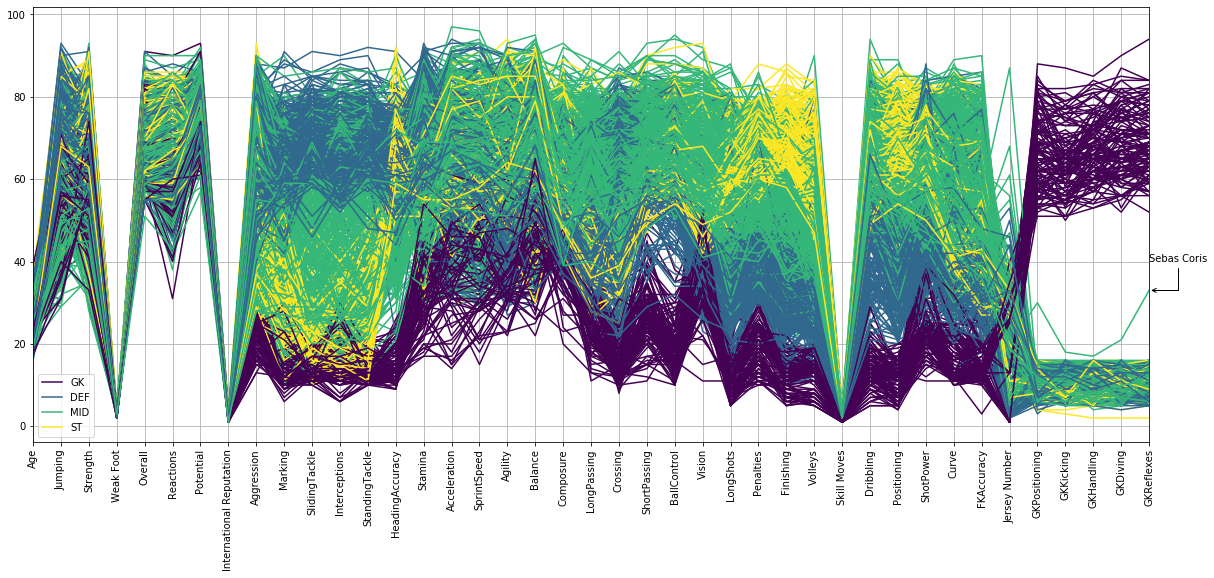

In [23]:
plt.figure(figsize=(20, 8))
g = parallel_coordinates(spanish_players.dropna(), 'GeneralPosition', cols=spanish_players.columns[clustermap.dendrogram_row.reordered_ind], axvlines=False, colormap='viridis')
plt.legend(loc='best')
plt.setp(g.get_xticklabels(), rotation=90);

plt.annotate('Sebas Coris', xy=(40, 33), xytext=(40, 40), arrowprops=dict(arrowstyle='->', connectionstyle='angle'))

## Faceted Visualizations

How you split the data can also provide many insights, and there are many ways in which we could split this data (which is why I chose it :)).

By providing the col parameter as Nationality, this will create one column for each nationality. col_wrap allows me to output only 5 columns per row.

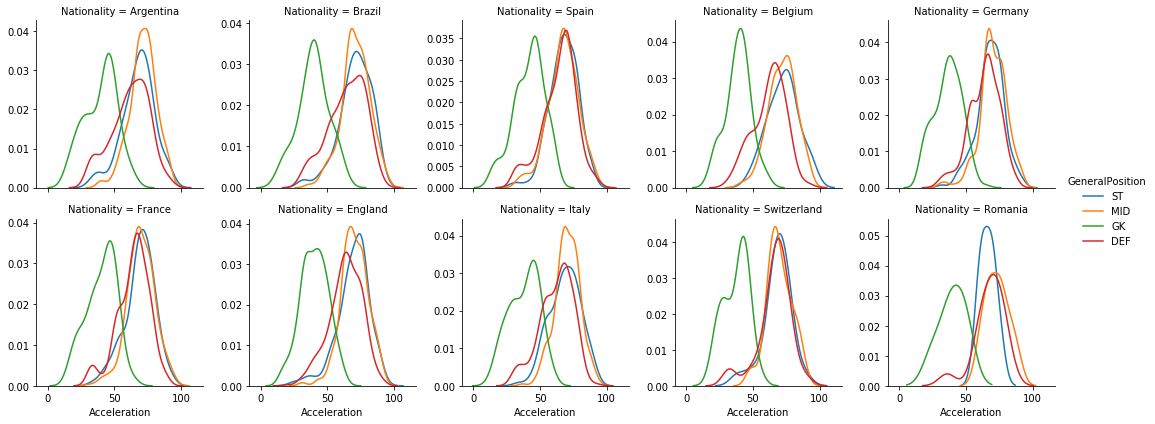

In [24]:
g = sns.FacetGrid(
    fifa[fifa.Nationality.isin(['Italy', 'France', 'Brazil', 'Belgium', 'Germany', 'Spain', 'Argentina', 'England', 'Switzerland', 'Romania'])], 
    col="Nationality", height=3, aspect=1, col_wrap=5, 
    hue='GeneralPosition', sharex=True, sharey=False)

g.map(sns.kdeplot, 'Acceleration').add_legend()

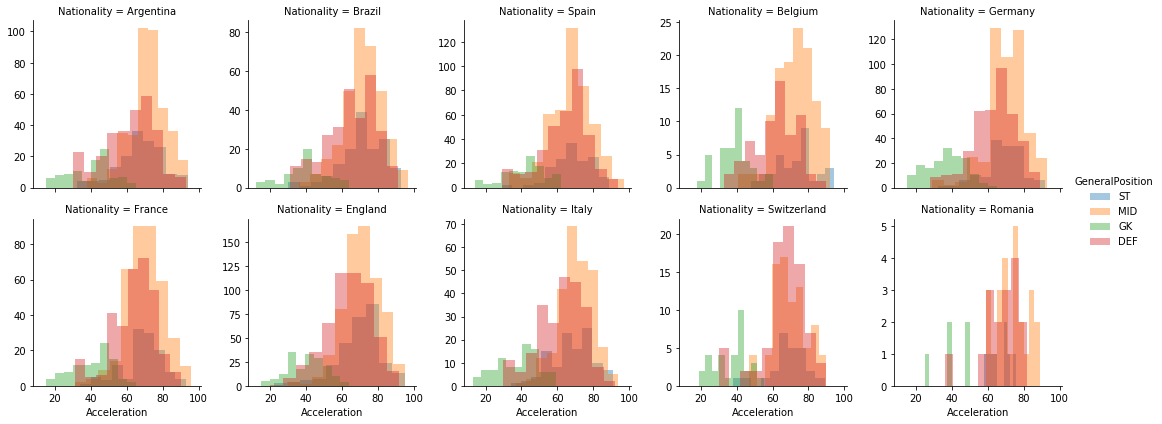

In [28]:
# or with histograms
g = sns.FacetGrid(
    fifa[fifa.Nationality.isin(['Italy', 'France', 'Brazil', 'Belgium', 'Germany', 'Spain', 'Argentina', 'England', 'Switzerland', 'Romania'])], 
    col="Nationality", height=3, aspect=1, col_wrap=5, 
    hue='GeneralPosition', sharex=True, sharey=False)

g.map(plt.hist, 'Acceleration', alpha=0.4).add_legend();

Or we can remove the 'noise' created by all these bars and use the KDE plot to enable comparison instead.

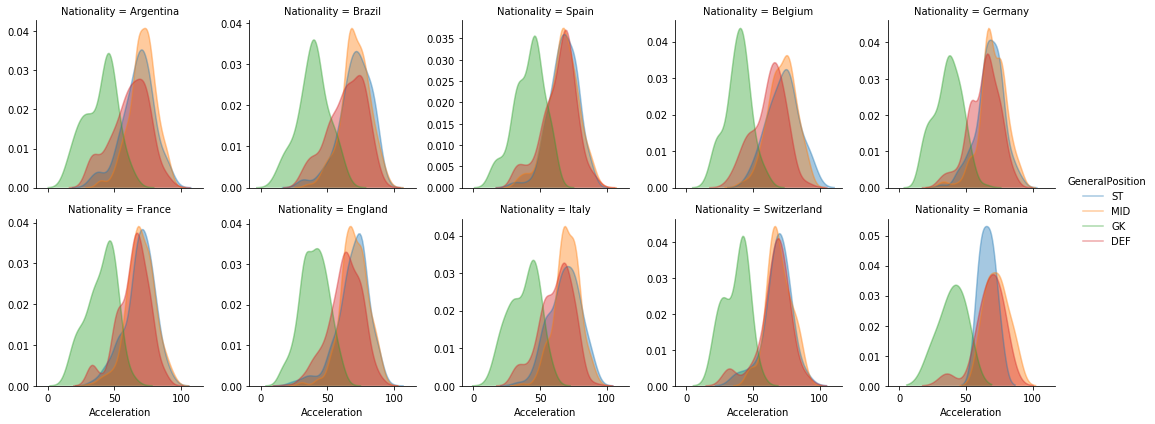

In [33]:
# or with KDE plots
g = sns.FacetGrid(
    fifa[fifa.Nationality.isin(['Italy', 'France', 'Brazil', 'Belgium', 'Germany', 'Spain', 'Argentina', 'England', 'Switzerland', 'Romania'])], 
    col="Nationality", height=3, aspect=1, col_wrap=5, 
    hue='GeneralPosition', sharex=True, sharey=False)

g.map(sns.kdeplot, 'Acceleration', alpha=0.4, shade=True).add_legend();

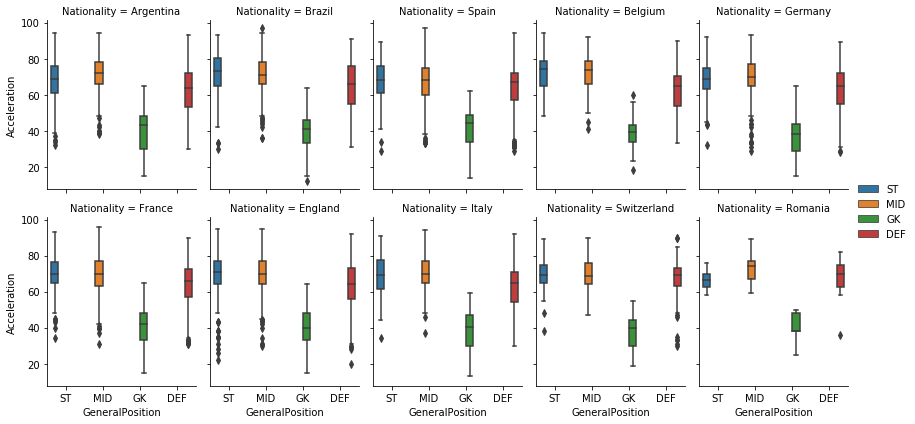

In [34]:
# For box plots, it's better to use the catplot function
g=sns.catplot(x="GeneralPosition", y="Acceleration",
    hue="GeneralPosition", col="Nationality", col_wrap=5,
    data=fifa[fifa.Nationality.isin(['Italy', 'France', 'Brazil', 'Belgium', 'Germany', 'Spain', 'Argentina', 'England', 'Switzerland', 'Romania'])], kind="box",
    height=3, aspect=.8);
g.add_legend();

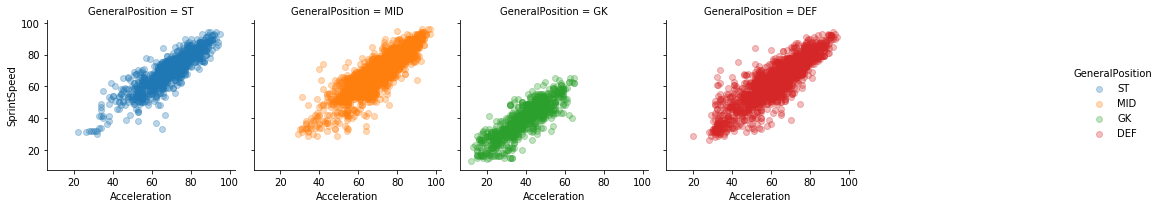

In [35]:
# or with a scatter plot
g = sns.FacetGrid(fifa[fifa.Nationality.isin(['Italy', 'France', 'Brazil', 'Belgium', 'Germany', 'Spain', 'Argentina', 'England', 'Switzerland', 'Romania'])], col="GeneralPosition", height=3, aspect=1, col_wrap=5, hue='GeneralPosition', sharex=True, sharey=True)
g.map(plt.scatter, 'Acceleration', 'SprintSpeed', alpha=0.3).add_legend();

# Should you choose to accept it

<p style="background: #ffeaa7; padding: 10px; color: #2c3e50"><strong>OPTIONAL EXERCISE</strong>: Our users want to see which attributes are most important for each position. How could you visualize this?</p>

In [ ]:
# Answer 18

# More Resources

There is really a huge number of resources out there to help with many types of visualizations, and when you need to create custom visualizations, you'll be able to ask online communities (including me) to help you.

## General Resources

 * Visual Vocabulary from the FT - https://ft-interactive.github.io/visual-vocabulary/

## Matplotlib
 * Annotations - https://matplotlib.org/tutorials/text/annotations.html#sphx-glr-tutorials-text-annotations-py
 * Scales - https://matplotlib.org/3.1.1/gallery/pyplots/pyplot_scales.html
 * Subplots - https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.subplots.html

## Python Visualization

 * Python Graph Gallery - https://python-graph-gallery.com/
 * Pandas Profiler - https://github.com/pandas-profiling/pandas-profiling
 * Seaborn Examples - https://seaborn.pydata.org/examples/index.html
 